## Stores Sales Prediction



#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem statement
- Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

### Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('Train.csv')

#### Show Top 5 Records

In [3]:
df.head(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

#### Shape of the dataset

In [5]:
df.shape

(8523, 12)

In [6]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Dataset information

- Item_Identifier: Unique product ID  
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [7]:
df['Item_Visibility'] = df['Item_Visibility']*100

In [8]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         1.604730   
1           DRC01         5.92          Regular         1.927822   
2           FDN15        17.50          Low Fat         1.676007   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

Check Missing values

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Item_Weight 0.1717  % missing values
Outlet_Size 0.2828  % missing values


 
#### Since there are two missing values, we need to find the relationship between missing values and Item_Outlet_Sales               
#### Let's plot some diagram for this relationship

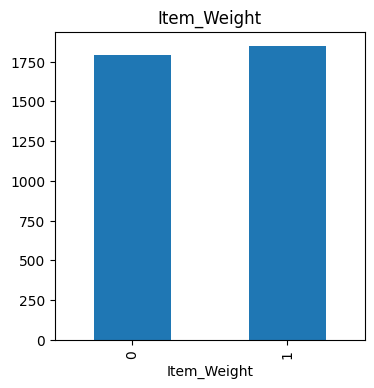

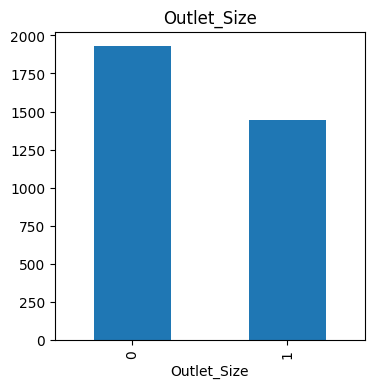

In [11]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean 'Item_Outlet_Sales' where the information is missing or present
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar(figsize=(4, 4))
    plt.title(feature)
    plt.show()
    

### Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values. So we have to check the dataset has outliers for imputing the nan values to the numerical feature. 

### CHECKING OUTLIERS FOR THE NUMERICAL CONTINOUS FEATURE (Item_Weight)

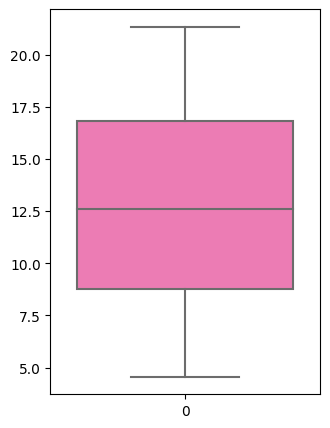

In [12]:
plt.subplots(1,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Item_Weight'],color='hotpink')
plt.show()

### From the above boxplot there are no outliers in the Item_weight feature. So, the mean value of the Item_weight feature is imputed in the missing cell of the Item_weight feature.

### Handling numerical variables that contains missing values

In [13]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Categorical variable that contains missing values

In [15]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [19]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 3.4 Checking the number of unique values of each column

In [20]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [21]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:

continuous_feature=[feature for feature in df.columns if df[feature].dtypes != 'O' and df[feature].dtypes != 'int64']
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [23]:
df1 = df[continuous_feature]

In [24]:
df1

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0           9.300         1.604730  249.8092          3735.1380
1           5.920         1.927822   48.2692           443.4228
2          17.500         1.676007  141.6180          2097.2700
3          19.200         0.000000  182.0950           732.3800
4           8.930         0.000000   53.8614           994.7052
...           ...              ...       ...                ...
8518        6.865         5.678339  214.5218          2778.3834
8519        8.380         4.698243  108.1570           549.2850
8520       10.600         3.518627   85.1224          1193.1136
8521        7.210        14.522065  103.1332          1845.5976
8522       14.800         4.487828   75.4670           765.6700

[8523 rows x 4 columns]

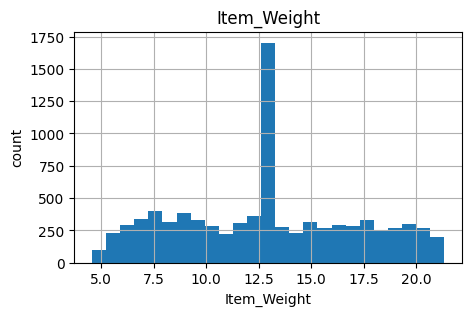

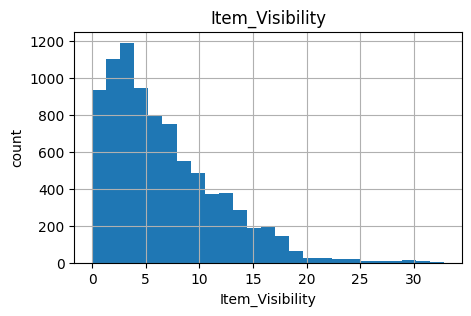

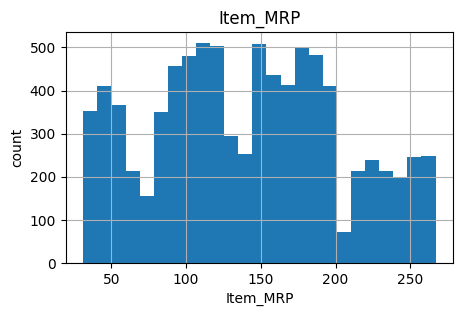

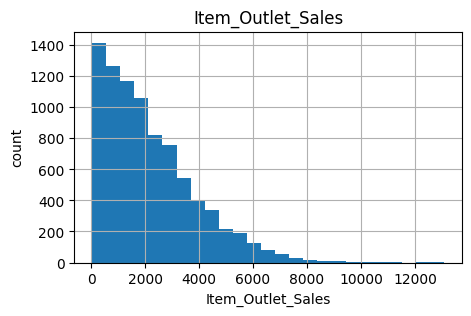

In [25]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in df1:
    data=df1.copy()
    data[feature].hist(bins=25, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

### Outliers

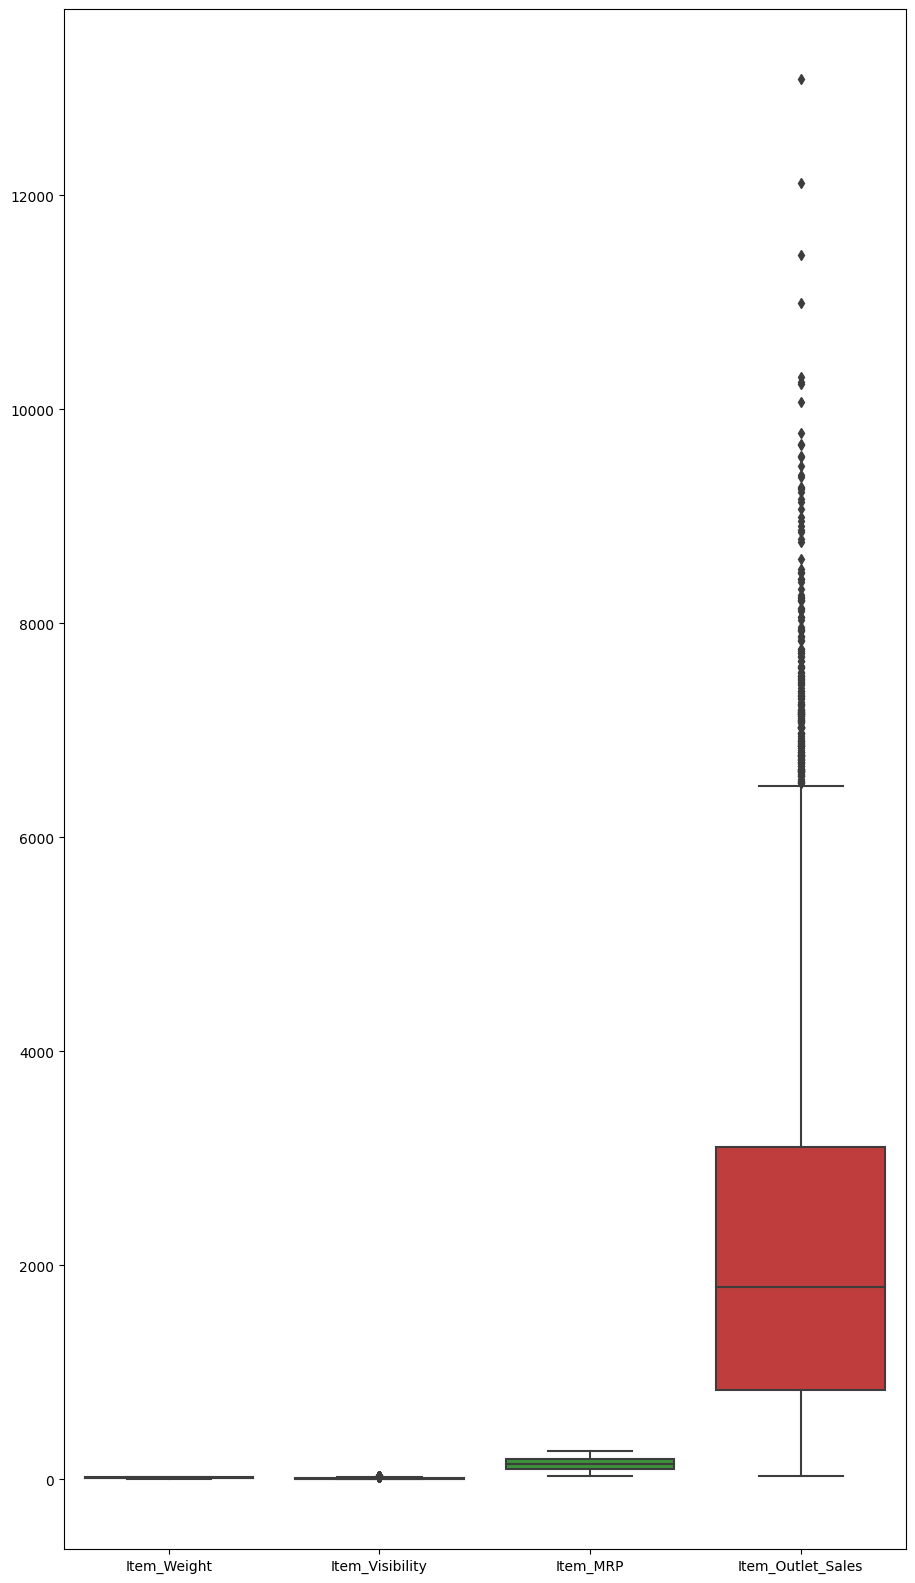

In [26]:
plt.subplots(1,figsize=(50,20))
plt.subplot(141)
sns.boxplot(df1)
plt.show()

In [27]:
df.shape

(8523, 12)

## Find out the relationship between categorical variable and dependent feature Item_Outlet_Sales

In [28]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print("categorical feature Count {}".format(len(categorical_features)))


categorical feature Count 7


In [29]:
categorical_features



['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

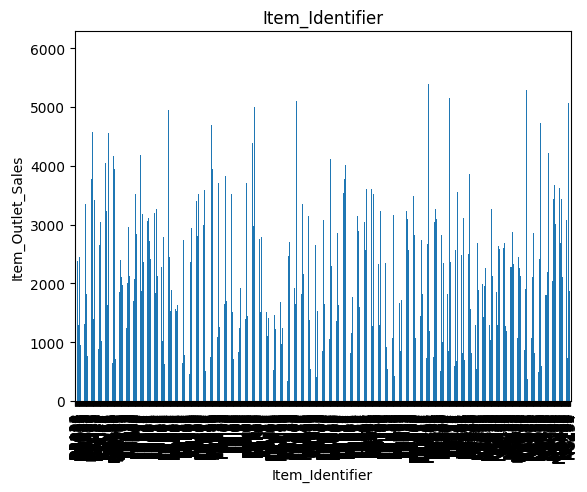

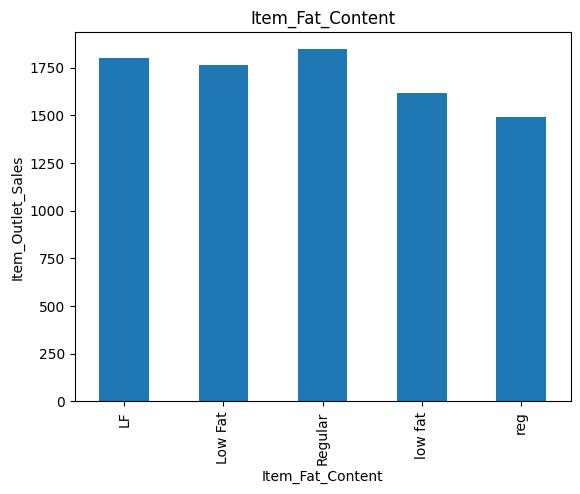

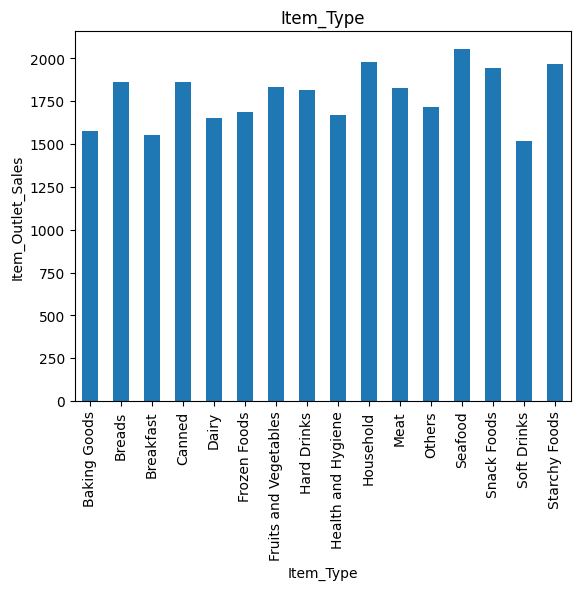

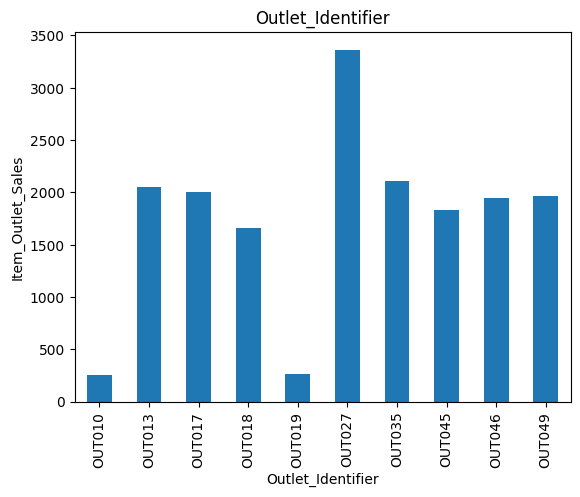

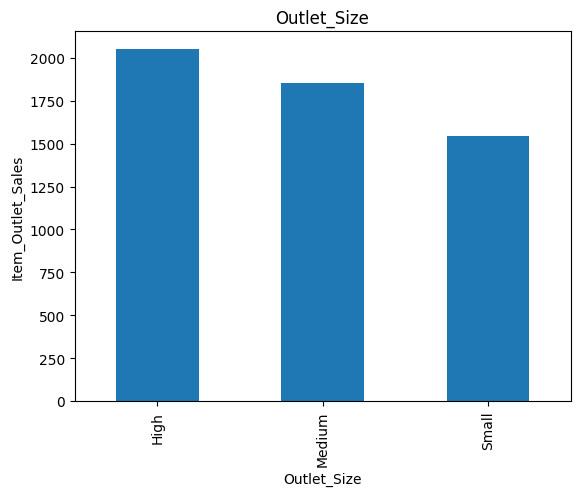

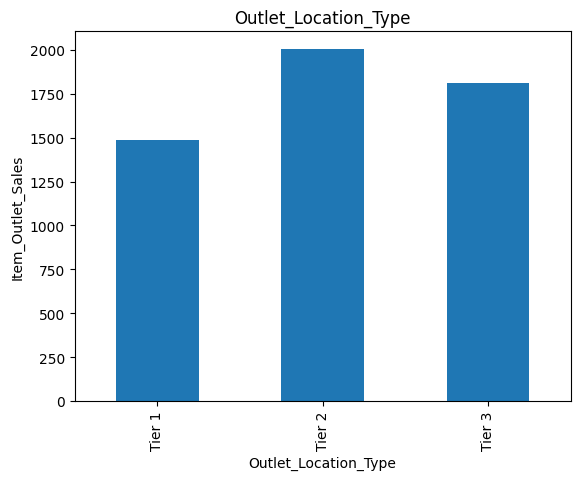

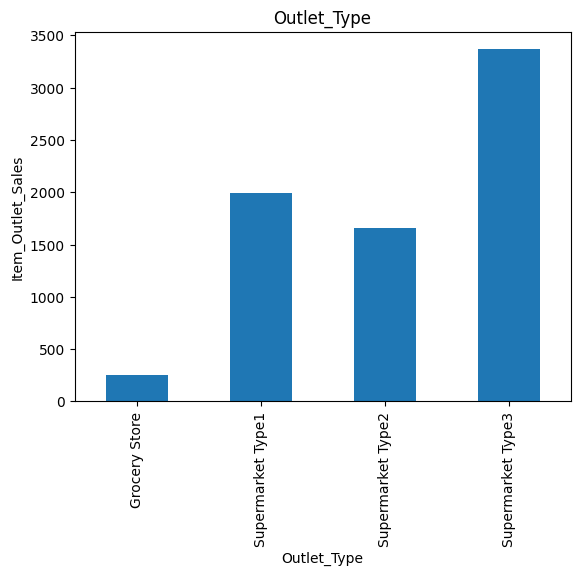

In [30]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()

    

## There is no relationship between the Item_Identifier and  Item_Outlet_Sales. So dropping the feature


In [31]:

df = df[['Item_Weight', 'Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]

In [32]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         1.604730                  Dairy   
1         5.92          Regular         1.927822            Soft Drinks   
2        17.50          Low Fat         1.676007                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0  249.8092            OUT049      Medium               Tier 1   
1   48.2692            OUT018      Medium               Tier 3   
2  141.6180            OUT049      Medium               Tier 1   
3  182.0950            OUT010      Medium               Tier 3   
4   53.8614            OUT013        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [33]:

continuous_feature=[feature for feature in df.columns if df[feature].dtypes != 'O' and df[feature].dtypes != 'int64']
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [34]:
df2 = df[continuous_feature]

In [35]:
df2

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0           9.300         1.604730  249.8092          3735.1380
1           5.920         1.927822   48.2692           443.4228
2          17.500         1.676007  141.6180          2097.2700
3          19.200         0.000000  182.0950           732.3800
4           8.930         0.000000   53.8614           994.7052
...           ...              ...       ...                ...
8518        6.865         5.678339  214.5218          2778.3834
8519        8.380         4.698243  108.1570           549.2850
8520       10.600         3.518627   85.1224          1193.1136
8521        7.210        14.522065  103.1332          1845.5976
8522       14.800         4.487828   75.4670           765.6700

[8523 rows x 4 columns]

## Find out the relationship between numerical variable and dependent feature Item_Outlet_Sales

In [36]:
df1

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0           9.300         1.604730  249.8092          3735.1380
1           5.920         1.927822   48.2692           443.4228
2          17.500         1.676007  141.6180          2097.2700
3          19.200         0.000000  182.0950           732.3800
4           8.930         0.000000   53.8614           994.7052
...           ...              ...       ...                ...
8518        6.865         5.678339  214.5218          2778.3834
8519        8.380         4.698243  108.1570           549.2850
8520       10.600         3.518627   85.1224          1193.1136
8521        7.210        14.522065  103.1332          1845.5976
8522       14.800         4.487828   75.4670           765.6700

[8523 rows x 4 columns]

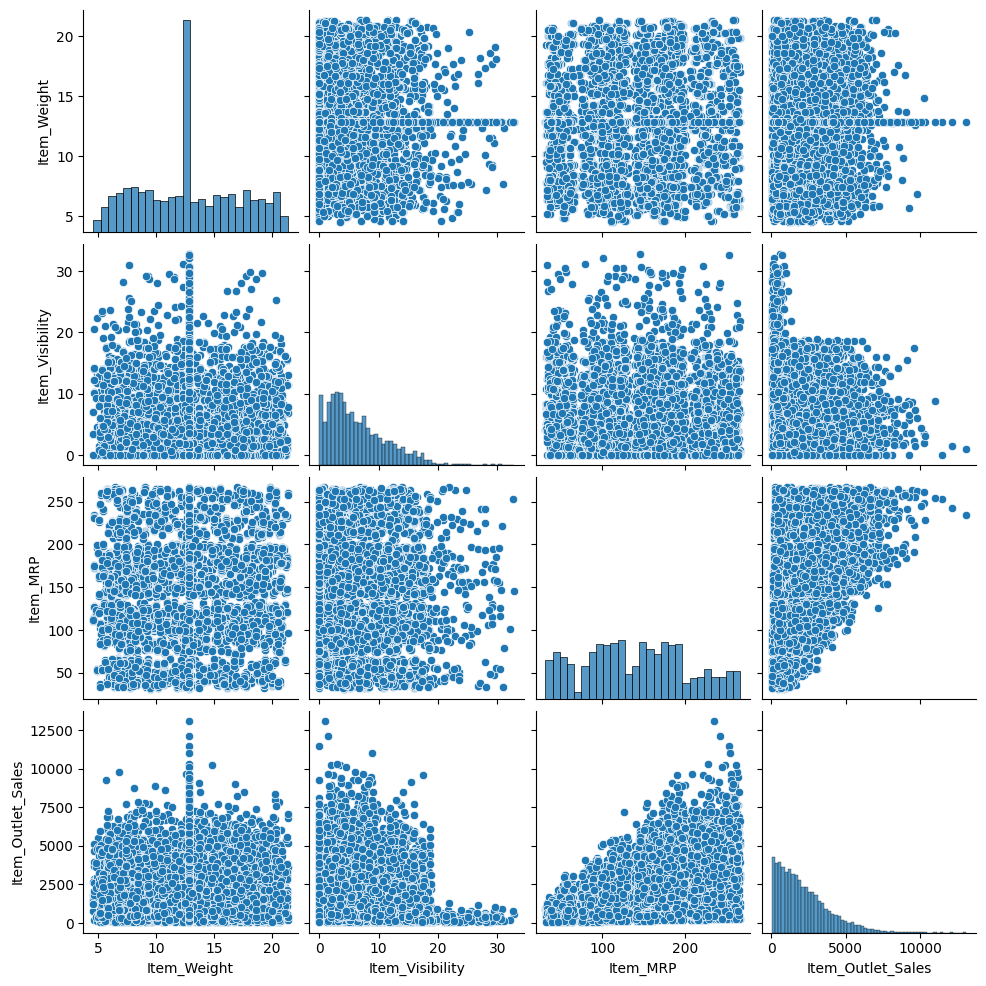

In [37]:
sns.pairplot(df1)

In [38]:
from ydata_profiling import ProfileReport
import ipywidgets as widgets


In [39]:
#pf = ProfileReport(df1)


In [40]:
#pf.to_widgets()

In [41]:
df2

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0           9.300         1.604730  249.8092          3735.1380
1           5.920         1.927822   48.2692           443.4228
2          17.500         1.676007  141.6180          2097.2700
3          19.200         0.000000  182.0950           732.3800
4           8.930         0.000000   53.8614           994.7052
...           ...              ...       ...                ...
8518        6.865         5.678339  214.5218          2778.3834
8519        8.380         4.698243  108.1570           549.2850
8520       10.600         3.518627   85.1224          1193.1136
8521        7.210        14.522065  103.1332          1845.5976
8522       14.800         4.487828   75.4670           765.6700

[8523 rows x 4 columns]

### Check statistics of data set

In [42]:
df2.describe()

Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales
count  8523.000000      8523.000000  8523.000000        8523.000000
mean     12.857645         6.613203   140.992782        2181.288914
std       4.226124         5.159782    62.275067        1706.499616
min       4.555000         0.000000    31.290000          33.290000
25%       9.310000         2.698948    93.826500         834.247400
50%      12.857645         5.393093   143.012800        1794.331000
75%      16.000000         9.458529   185.643700        3101.296400
max      21.350000        32.839095   266.888400       13086.964800

#### Insight
- From above description of numerical data, all means are very far to each other;
- All standard deviations are very far;

#### So Standardization is reauired to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. 

#### z = (x-x_mean)/std

In [43]:
from sklearn.preprocessing import RobustScaler


In [44]:
"""scaler=RobustScaler()

df_scaled=scaler.fit_transform(df2)"""

'scaler=RobustScaler()\n\ndf_scaled=scaler.fit_transform(df2)'

In [45]:
"""df_numerical = pd.DataFrame(df_scaled)"""

'df_numerical = pd.DataFrame(df_scaled)'

In [46]:
"""df_numerical"""

'df_numerical'

In [47]:
"""df_numerical = df_numerical.rename(columns={0: 'Item_Weight'})
df_numerical = df_numerical.rename(columns={1: 'Item_Visibility'})
df_numerical = df_numerical.rename(columns={2: 'Item_MRP'})
df_numerical = df_numerical.rename(columns={3: 'Item_Outlet_Sales'})

"""

"df_numerical = df_numerical.rename(columns={0: 'Item_Weight'})\ndf_numerical = df_numerical.rename(columns={1: 'Item_Visibility'})\ndf_numerical = df_numerical.rename(columns={2: 'Item_MRP'})\ndf_numerical = df_numerical.rename(columns={3: 'Item_Outlet_Sales'})\n\n"

In [48]:
"""df_numerical"""

'df_numerical'

In [49]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df2)

PowerTransformer()

In [50]:
df_scaled = pt.fit_transform(df2)

In [51]:
df_scaled

array([[-0.82263634, -1.09626653,  1.62367023,  0.98507755],
       [-1.73380133, -0.96878975, -1.59501643, -1.21813513],
       [ 1.08636176, -1.06720451,  0.08123678,  0.22036037],
       ...,
       [-0.49655592, -0.45741724, -0.86792986, -0.39304411],
       [-1.37344322,  1.38799799, -0.54899589,  0.0706692 ],
       [ 0.49178563, -0.20745937, -1.04722682, -0.79793408]])

In [52]:
df_numerical = pd.DataFrame(df_scaled)

In [53]:
df_numerical

0         1         2         3
0    -0.822636 -1.096267  1.623670  0.985078
1    -1.733801 -0.968790 -1.595016 -1.218135
2     1.086362 -1.067205  0.081237  0.220360
3     1.447728 -1.996676  0.689968 -0.835183
4    -0.917588 -1.996676 -1.476078 -0.566616
...        ...       ...       ...       ...
8518 -1.468096  0.059306  1.148258  0.573946
8519 -1.060659 -0.157468 -0.463127 -1.062855
8520 -0.496556 -0.457417 -0.867930 -0.393044
8521 -1.373443  1.387998 -0.548996  0.070669
8522  0.491786 -0.207459 -1.047227 -0.797934

[8523 rows x 4 columns]

In [54]:
df_numerical = df_numerical.rename(columns={0: 'Item_Weight'})
df_numerical = df_numerical.rename(columns={1: 'Item_Visibility'})
df_numerical = df_numerical.rename(columns={2: 'Item_MRP'})
df_numerical = df_numerical.rename(columns={3: 'Item_Outlet_Sales'})



In [55]:
df_numerical

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0       -0.822636        -1.096267  1.623670           0.985078
1       -1.733801        -0.968790 -1.595016          -1.218135
2        1.086362        -1.067205  0.081237           0.220360
3        1.447728        -1.996676  0.689968          -0.835183
4       -0.917588        -1.996676 -1.476078          -0.566616
...           ...              ...       ...                ...
8518    -1.468096         0.059306  1.148258           0.573946
8519    -1.060659        -0.157468 -0.463127          -1.062855
8520    -0.496556        -0.457417 -0.867930          -0.393044
8521    -1.373443         1.387998 -0.548996           0.070669
8522     0.491786        -0.207459 -1.047227          -0.797934

[8523 rows x 4 columns]

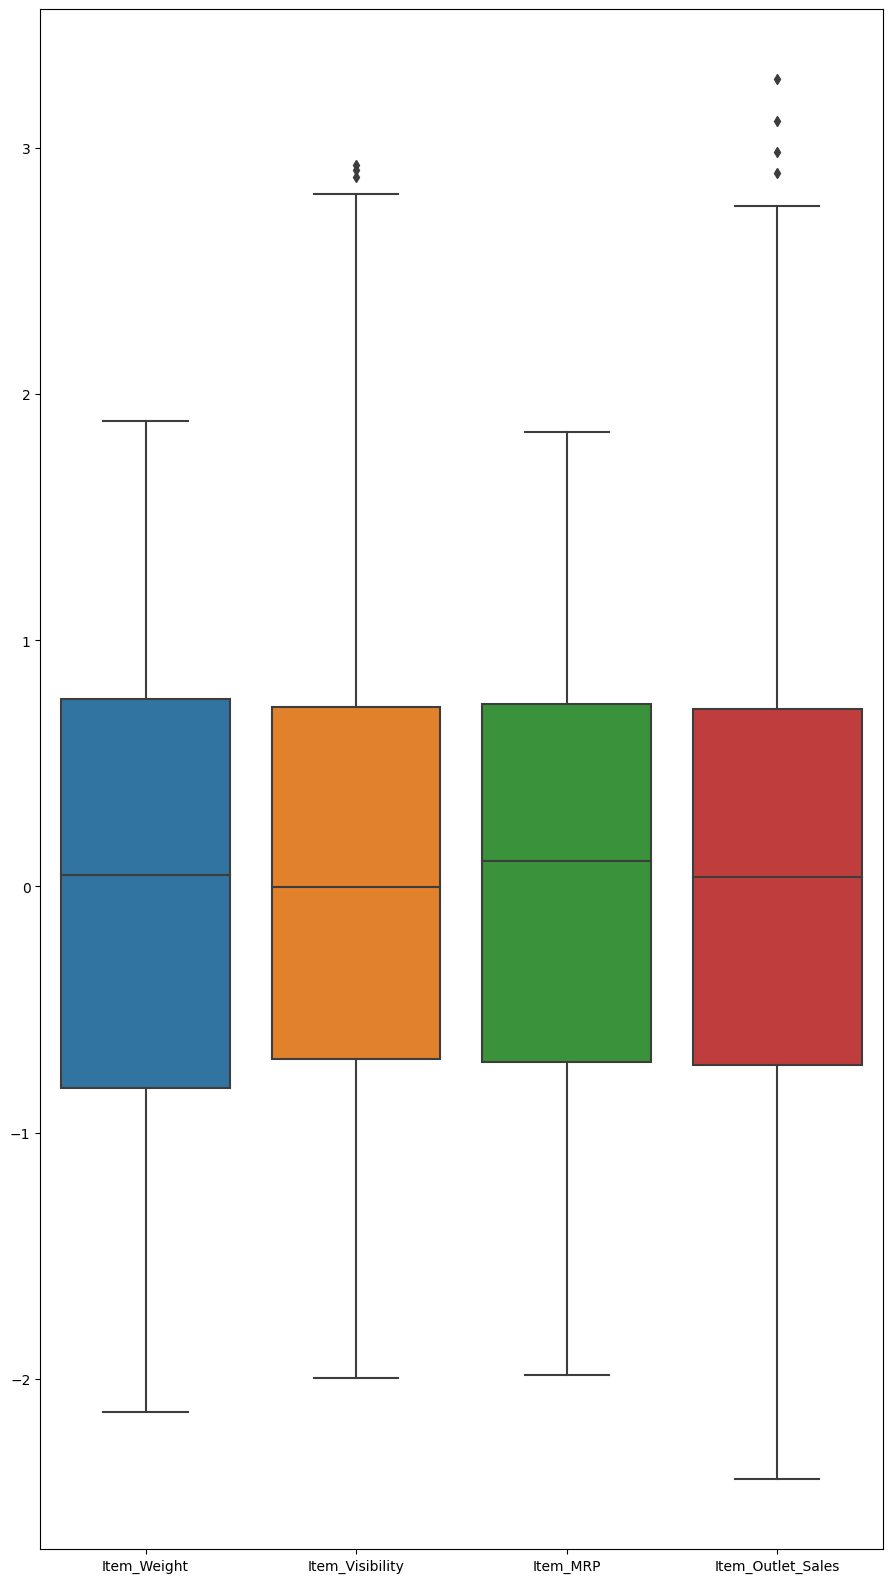

In [56]:
plt.subplots(1,figsize=(50,20))
plt.subplot(141)
sns.boxplot(df_numerical)
plt.show()

In [57]:
import pandas_profiling as pp
pp.ProfileReport(df_numerical)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Onehotencoding with many categories in a feature


In [58]:
df.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         1.604730                  Dairy   
1         5.92          Regular         1.927822            Soft Drinks   
2        17.50          Low Fat         1.676007                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0  249.8092            OUT049      Medium               Tier 1   
1   48.2692            OUT018      Medium               Tier 3   
2  141.6180            OUT049      Medium               Tier 1   
3  182.0950            OUT010      Medium               Tier 3   
4   53.8614            OUT013        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [59]:
print("Categories in 'Item_Fat_Content' variable:",end=" " )
print(df['Item_Fat_Content'].unique())

print("Categories in 'Item_Type' variable:",end=" ")
print(df['Item_Type'].unique())

print("Categories in'Outlet_Size' variable:",end=" " )
print(df['Outlet_Size'].unique())

print("Categories in 'Outlet_Location_Type' variable:",end=" " )
print(df['Outlet_Location_Type'].unique())

print("Categories in 'Outlet_Type' variable:",end=" " )
print(df['Outlet_Type'].unique())


Categories in 'Item_Fat_Content' variable: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Categories in 'Item_Type' variable: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Categories in'Outlet_Size' variable: ['Medium' 'High' 'Small']
Categories in 'Outlet_Location_Type' variable: ['Tier 1' 'Tier 3' 'Tier 2']
Categories in 'Outlet_Type' variable: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [60]:
df = df.replace('low fat', 'Low Fat')
df = df.replace('LF', 'Low Fat')
df = df.replace('reg', 'Regular')



In [61]:
df_onehot = df.copy()

In [62]:
df_onehot

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         1.604730                  Dairy   
1           5.920          Regular         1.927822            Soft Drinks   
2          17.500          Low Fat         1.676007                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         5.678339            Snack Foods   
8519        8.380          Regular         4.698243           Baking Goods   
8520       10.600          Low Fat         3.518627     Health and Hygiene   
8521        7.210          Regular        14.522065            Snack Foods   
8522       14.800          Low Fat         4.487828            Soft Drinks   

      Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0     249.8092            OUT049      Medium               Tier 1   
1      48.2692            OUT018      Medium               Tier 3   
2     141.6180            OUT049      Medium               Tier 1   
3     182.0950            OUT010      Medium               Tier 3   
4      53.8614            OUT013        High               Tier 3   
...        ...               ...         ...                  ...   
8518  214.5218            OUT013        High               Tier 3   
8519  108.1570            OUT045      Medium               Tier 2   
8520   85.1224            OUT035       Small               Tier 2   
8521  103.1332            OUT018      Medium               Tier 3   
8522   75.4670            OUT046       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [63]:

del df_onehot['Item_Weight']

del df_onehot['Item_Visibility']

del df_onehot['Item_MRP']

del df_onehot['Item_Outlet_Sales']




In [64]:
df_onehot

Item_Fat_Content              Item_Type Outlet_Identifier Outlet_Size  \
0             Low Fat                  Dairy            OUT049      Medium   
1             Regular            Soft Drinks            OUT018      Medium   
2             Low Fat                   Meat            OUT049      Medium   
3             Regular  Fruits and Vegetables            OUT010      Medium   
4             Low Fat              Household            OUT013        High   
...               ...                    ...               ...         ...   
8518          Low Fat            Snack Foods            OUT013        High   
8519          Regular           Baking Goods            OUT045      Medium   
8520          Low Fat     Health and Hygiene            OUT035       Small   
8521          Regular            Snack Foods            OUT018      Medium   
8522          Low Fat            Soft Drinks            OUT046       Small   

     Outlet_Location_Type        Outlet_Type  
0                  Tier 1  Supermarket Type1  
1                  Tier 3  Supermarket Type2  
2                  Tier 1  Supermarket Type1  
3                  Tier 3      Grocery Store  
4                  Tier 3  Supermarket Type1  
...                   ...                ...  
8518               Tier 3  Supermarket Type1  
8519               Tier 2  Supermarket Type1  
8520               Tier 2  Supermarket Type1  
8521               Tier 3  Supermarket Type2  
8522               Tier 1  Supermarket Type1  

[8523 rows x 6 columns]

In [65]:
for i in df_onehot.columns:
    print(i, ': ',len(df_onehot[i].unique()),'labels')

Item_Fat_Content :  2 labels
Item_Type :  16 labels
Outlet_Identifier :  10 labels
Outlet_Size :  3 labels
Outlet_Location_Type :  3 labels
Outlet_Type :  4 labels


In [66]:


# Create a one-hot encoded version of the DataFrame
df_one_hot = pd.get_dummies(df_onehot, columns=["Item_Fat_Content","Item_Type","Outlet_Identifier",
                                                            "Outlet_Size","Outlet_Location_Type",
                                                             "Outlet_Type"])

# Print the one-hot encoded DataFrame
print(df_one_hot)


      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         True                     False   
1                        False                      True   
2                         True                     False   
3                        False                      True   
4                         True                     False   
...                        ...                       ...   
8518                      True                     False   
8519                     False                      True   
8520                      True                     False   
8521                     False                      True   
8522                      True                     False   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                      False             False                False   
1                      False             False                False   
2                      False             False                Fals

In [67]:
df_one_hot

Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         True                     False   
1                        False                      True   
2                         True                     False   
3                        False                      True   
4                         True                     False   
...                        ...                       ...   
8518                      True                     False   
8519                     False                      True   
8520                      True                     False   
8521                     False                      True   
8522                      True                     False   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                      False             False                False   
1                      False             False                False   
2                      False             False                False   
3                      False             False                False   
4                      False             False                False   
...                      ...               ...                  ...   
8518                   False             False                False   
8519                    True             False                False   
8520                   False             False                False   
8521                   False             False                False   
8522                   False             False                False   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                False             True                   False   
1                False            False                   False   
2                False            False                   False   
3                False            False                   False   
4                False            False                   False   
...                ...              ...                     ...   
8518             False            False                   False   
8519             False            False                   False   
8520             False            False                   False   
8521             False            False                   False   
8522             False            False                   False   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  ...  \
0                               False                  False  ...   
1                               False                  False  ...   
2                               False                  False  ...   
3                                True                  False  ...   
4                               False                  False  ...   
...                               ...                    ...  ...   
8518                            False                  False  ...   
8519                            False                  False  ...   
8520                            False                  False  ...   
8521                            False                  False  ...   
8522                            False                  False  ...   

      Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0                False                True              False   
1                False                True              False   
2                False                True              False   
3                False                True              False   
4                 True               False              False   
...                ...                 ...                ...   
8518              True               False              False   
8519             False                True              False   
8520             False               False               True   
8521             False                True              False   
8522             False               False               True   

      Outlet_Loca

In [68]:
column_names = df_one_hot.columns

# Print the column names
print(column_names)

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Groce

In [69]:
data_transformed = pd.concat([df_numerical, df_one_hot], axis=1, join='inner')

In [70]:
data_transformed

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0       -0.822636        -1.096267  1.623670           0.985078   
1       -1.733801        -0.968790 -1.595016          -1.218135   
2        1.086362        -1.067205  0.081237           0.220360   
3        1.447728        -1.996676  0.689968          -0.835183   
4       -0.917588        -1.996676 -1.476078          -0.566616   
...           ...              ...       ...                ...   
8518    -1.468096         0.059306  1.148258           0.573946   
8519    -1.060659        -0.157468 -0.463127          -1.062855   
8520    -0.496556        -0.457417 -0.867930          -0.393044   
8521    -1.373443         1.387998 -0.548996           0.070669   
8522     0.491786        -0.207459 -1.047227          -0.797934   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         True                     False   
1                        False                      True   
2                         True                     False   
3                        False                      True   
4                         True                     False   
...                        ...                       ...   
8518                      True                     False   
8519                     False                      True   
8520                      True                     False   
8521                     False                      True   
8522                      True                     False   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                      False             False                False   
1                      False             False                False   
2                      False             False                False   
3                      False             False                False   
4                      False             False                False   
...                      ...               ...                  ...   
8518                   False             False                False   
8519                    True             False                False   
8520                   False             False                False   
8521                   False             False                False   
8522                   False             False                False   

      Item_Type_Canned  ...  Outlet_Size_High  Outlet_Size_Medium  \
0                False  ...             False                True   
1                False  ...             False                True   
2                False  ...             False                True   
3                False  ...             False                True   
4                False  ...              True               False   
...                ...  ...               ...                 ...   
8518             False  ...              True               False   
8519             False  ...             False                True   
8520             False  ...             False               False   
8521             False  ...             False                True   
8522             False  ...             False               False   

      Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                 False                         True   
1                 False                        False   
2                 False                         True   
3                 False                        False   
4                 False                        False   
...                 ...                          ...   
8518              False                        False   
8519              False                        False   
8520               True                        False   
8521              False                        False   
8522               True                         True   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                           False                        Fa

In [157]:
data_transformed = data_transformed.replace(True, 1)
data_transformed = data_transformed.replace(False, 0)


In [158]:
data_transformed

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0       -0.822636        -1.096267  1.623670           0.985078   
1       -1.733801        -0.968790 -1.595016          -1.218135   
2        1.086362        -1.067205  0.081237           0.220360   
3        1.447728        -1.996676  0.689968          -0.835183   
4       -0.917588        -1.996676 -1.476078          -0.566616   
...           ...              ...       ...                ...   
8518    -1.468096         0.059306  1.148258           0.573946   
8519    -1.060659        -0.157468 -0.463127          -1.062855   
8520    -0.496556        -0.457417 -0.867930          -0.393044   
8521    -1.373443         1.387998 -0.548996           0.070669   
8522     0.491786        -0.207459 -1.047227          -0.797934   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                            1                         0   
1                            0                         1   
2                            1                         0   
3                            0                         1   
4                            1                         0   
...                        ...                       ...   
8518                         1                         0   
8519                         0                         1   
8520                         1                         0   
8521                         0                         1   
8522                         1                         0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                          0                 0                    0   
1                          0                 0                    0   
2                          0                 0                    0   
3                          0                 0                    0   
4                          0                 0                    0   
...                      ...               ...                  ...   
8518                       0                 0                    0   
8519                       1                 0                    0   
8520                       0                 0                    0   
8521                       0                 0                    0   
8522                       0                 0                    0   

      Item_Type_Canned  ...  Outlet_Size_High  Outlet_Size_Medium  \
0                    0  ...                 0                   1   
1                    0  ...                 0                   1   
2                    0  ...                 0                   1   
3                    0  ...                 0                   1   
4                    0  ...                 1                   0   
...                ...  ...               ...                 ...   
8518                 0  ...                 1                   0   
8519                 0  ...                 0                   1   
8520                 0  ...                 0                   0   
8521                 0  ...                 0                   1   
8522                 0  ...                 0                   0   

      Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                     0                            1   
1                     0                            0   
2                     0                            1   
3                     0                            0   
4                     0                            0   
...                 ...                          ...   
8518                  0                            0   
8519                  0                            0   
8520                  1                            0   
8521                  0                            0   
8522                  1                            1   

      Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                               0                          

In [159]:
print(data_transformed.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Locat

<Axes: >

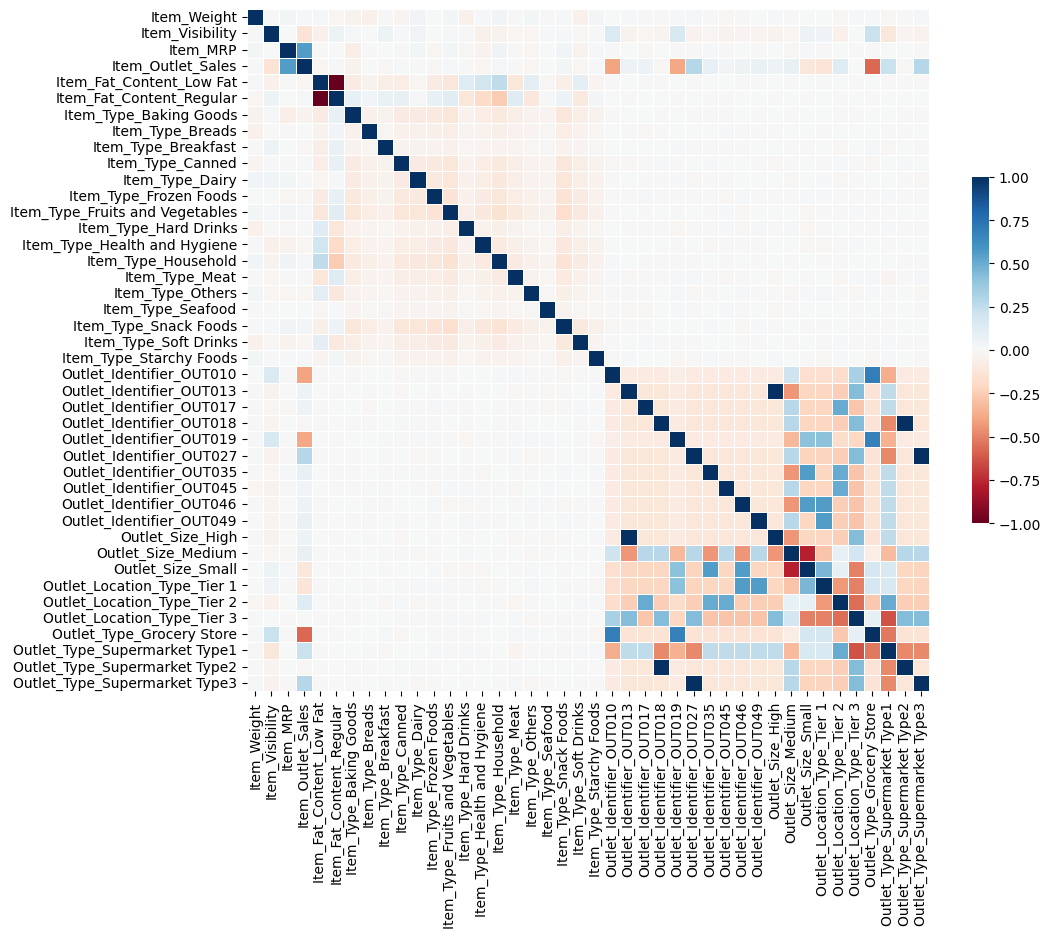

In [160]:
import seaborn as sns
corr = data_transformed.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [161]:
data_transformed.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                         1.000000        -0.007410  0.023989   
Item_Visibility                    -0.007410         1.000000  0.002897   
Item_MRP                            0.023989         0.002897  1.000000   
Item_Outlet_Sales                   0.009947        -0.135179  0.558871   
Item_Fat_Content_Low Fat            0.021159        -0.047839 -0.006389   
Item_Fat_Content_Regular           -0.021159         0.047839  0.006389   
Item_Type_Baking Goods             -0.033591         0.017916 -0.065566   
Item_Type_Breads                   -0.051089         0.003834 -0.000364   
Item_Type_Breakfast                -0.002406         0.047398  0.002169   
Item_Type_Canned                   -0.031182         0.008426 -0.003881   
Item_Type_Dairy                     0.032544         0.036273  0.030261   
Item_Type_Frozen Foods              0.001325         0.001244 -0.017363   
Item_Type_Fruits and Vegetables     0.030143         0.019305  0.025371   
Item_Type_Hard Drinks              -0.047092        -0.004589 -0.010798   
Item_Type_Health and Hygiene        0.014974        -0.048573 -0.040925   
Item_Type_Household                 0.033485        -0.037076  0.046114   
Item_Type_Meat                     -0.001485        -0.022085 -0.002120   
Item_Type_Others                    0.028131        -0.018816 -0.017626   
Item_Type_Seafood                  -0.006310         0.012809  0.001172   
Item_Type_Snack Foods               0.011324         0.008007  0.037172   
Item_Type_Soft Drinks              -0.047021        -0.010735 -0.036591   
Item_Type_Starchy Foods             0.024227        -0.002018  0.012122   
Outlet_Identifier_OUT010            0.001055         0.145476 -0.001114   
Outlet_Identifier_OUT013            0.008835        -0.033903  0.002108   
Outlet_Identifier_OUT017           -0.005321        -0.022871 -0.009108   
Outlet_Identifier_OUT018           -0.002333        -0.029160  0.003472   
Outlet_Identifier_OUT019            0.011731         0.160061 -0.004510   
Outlet_Identifier_OUT027            0.016023        -0.041611 -0.006550   
Outlet_Identifier_OUT035           -0.005886        -0.023122  0.012547   
Outlet_Identifier_OUT045           -0.020019        -0.031321 -0.000205   
Outlet_Identifier_OUT046           -0.003171        -0.030426  0.005455   
Outlet_Identifier_OUT049            0.001900        -0.026421 -0.003351   
Outlet_Size_High                    0.008835        -0.033903  0.002108   
Outlet_Size_Medium                 -0.005662        -0.023192 -0.010629   
Outlet_Size_Small                   0.000009         0.048743  0.010077   
Outlet_Location_Type_Tier 1         0.005414         0.046452 -0.000960   
Outlet_Location_Type_Tier 2        -0.020744        -0.051355  0.002161   
Outlet_Location_Type_Tier 3         0.014942         0.006605 -0.001193   
Outlet_Type_Grocery Store           0.009272         0.223627 -0.004090   
Outlet_Type_Supermarket Type1      -0.015495        -0.110163  0.004894   
Outlet_Type_Supermarket Type2      -0.002333        -0.029160  0.003472   
Outlet_Type_Supermarket Type3       0.016023        -0.041611 -0.006550   

                                 Item_Outlet_Sales  Item_Fat_Content_Low Fat  \
Item_Weight                               0.009947                  0.021159   
Item_Visibility                          -0.135179                 -0.047839   
Item_MRP                                  0.558871                 -0.006389   
Item_Outlet_Sales                         1.000000                 -0.016269   
Item_Fat_Content_Low Fat                 -0.016269                  1.000000   
Item_Fat_Content_Regular                  0.016269                 -1.000000   
Item_Type_Baking Goods                   -0.036267                 -0.083804   
Item_Type_Breads                          0.005644                 -0.032643   
Item_Type_Breakfast                      -0.012200                 -0.065711   
Item_Ty

In [162]:
data_transformed.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0    -0.822636        -1.096267  1.623670           0.985078   
1    -1.733801        -0.968790 -1.595016          -1.218135   
2     1.086362        -1.067205  0.081237           0.220360   
3     1.447728        -1.996676  0.689968          -0.835183   
4    -0.917588        -1.996676 -1.476078          -0.566616   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  Item_Type_Baking Goods  \
0                         1                         0                       0   
1                         0                         1                       0   
2                         1                         0                       0   
3                         0                         1                       0   
4                         1                         0                       0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  ...  \
0                 0                    0                 0  ...   
1                 0                    0                 0  ...   
2                 0                    0                 0  ...   
3                 0                    0                 0  ...   
4                 0                    0                 0  ...   

   Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0                 0                   1                  0   
1                 0                   1                  0   
2                 0                   1                  0   
3                 0                   1                  0   
4                 1                   0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 42 columns]

In [163]:
X = data_transformed.drop(columns=['Item_Outlet_Sales'],axis=1)

In [164]:
y_final = data_transformed['Item_Outlet_Sales']

In [165]:
y_final

0       0.985078
1      -1.218135
2       0.220360
3      -0.835183
4      -0.566616
          ...   
8518    0.573946
8519   -1.062855
8520   -0.393044
8521    0.070669
8522   -0.797934
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

<Axes: >

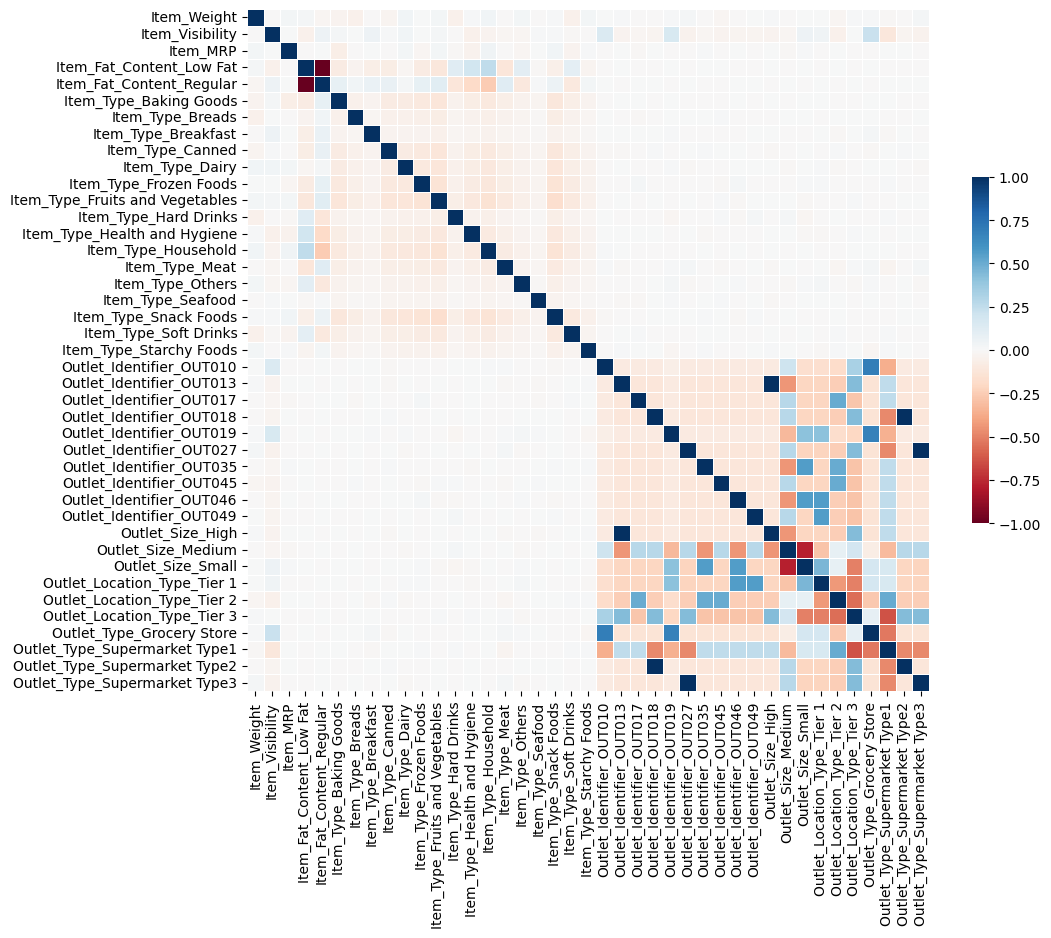

In [166]:
import seaborn as sns
corr = X.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [167]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [168]:
corr_features = correlation(X, 0.75)
corr_features

{'Item_Fat_Content_Regular',
 'Outlet_Size_High',
 'Outlet_Size_Small',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3'}

In [169]:
X_new = X.drop(corr_features,axis=1)


In [170]:
X_new.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Fat_Content_Low Fat  \
0    -0.822636        -1.096267  1.623670                         1   
1    -1.733801        -0.968790 -1.595016                         0   
2     1.086362        -1.067205  0.081237                         1   
3     1.447728        -1.996676  0.689968                         0   
4    -0.917588        -1.996676 -1.476078                         1   

   Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0                 0                    0   
1                       0                 0                    0   
2                       0                 0                    0   
3                       0                 0                    0   
4                       0                 0                    0   

   Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  ...  \
0                 0                1                       0  ...   
1                 0                0                       0  ...   
2                 0                0                       0  ...   
3                 0                0                       0  ...   
4                 0                0                       0  ...   

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_Medium  \
0                         0                         1                   1   
1                         0                         0                   1   
2                         0                         1                   1   
3                         0                         0                   1   
4                         0                         0                   0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  
0                              1  
1                              0  
2                              1  
3                              0  
4                              1  

[5 rows x 36 columns]

<Axes: >

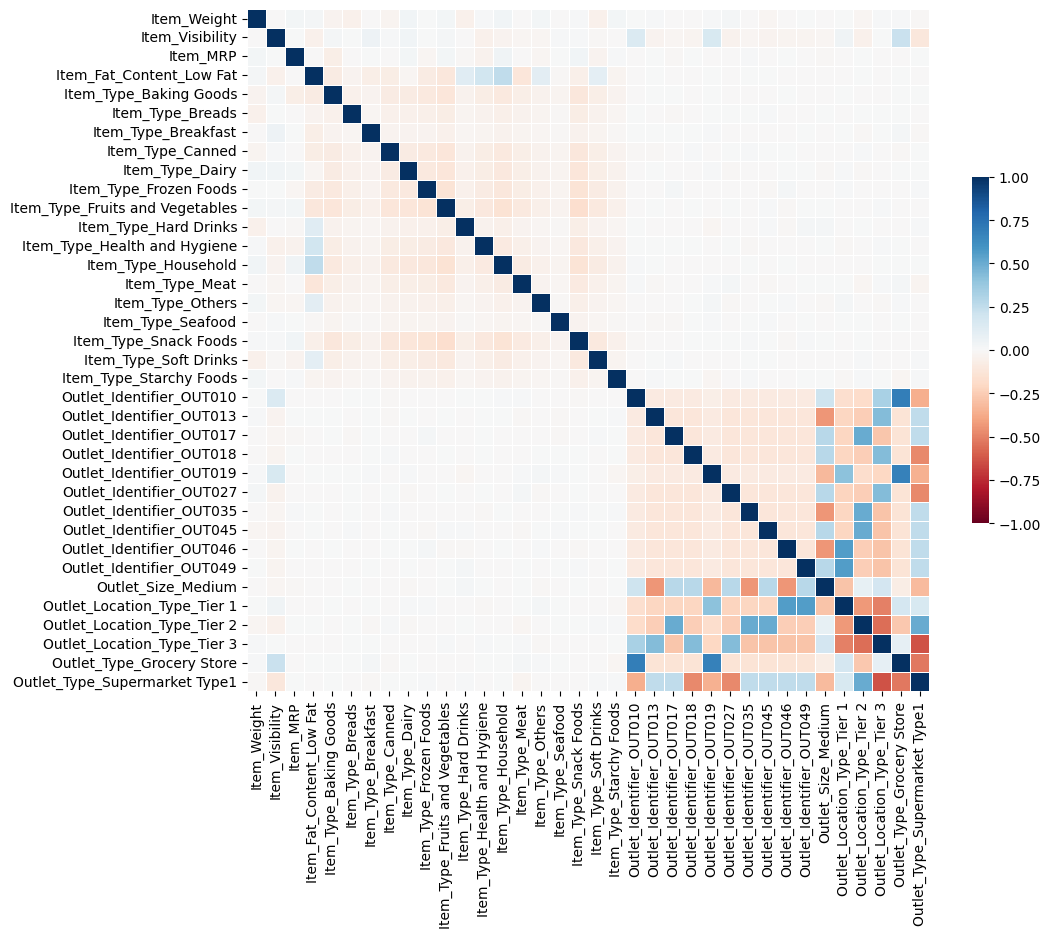

In [171]:
import seaborn as sns
corr = X_new.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [81]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_new, y_final)
mutual_info

array([0.06819423, 0.08153958, 0.92748119, 0.02165028, 0.00507442,
       0.01099557, 0.        , 0.00368819, 0.01534442, 0.00782385,
       0.00899996, 0.01333377, 0.01085104, 0.00465252, 0.        ,
       0.        , 0.        , 0.01601453, 0.00546494, 0.        ,
       0.09652889, 0.00308279, 0.00621284, 0.00410027, 0.09106808,
       0.04715409, 0.00535001, 0.00750067, 0.0053099 , 0.00261739,
       0.00868339, 0.01259439, 0.02394949, 0.00357835, 0.22210653,
       0.09240028])

In [82]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_new.columns
mutual_info.sort_values(ascending=False)

Item_MRP                           0.927481
Outlet_Type_Grocery Store          0.222107
Outlet_Identifier_OUT010           0.096529
Outlet_Type_Supermarket Type1      0.092400
Outlet_Identifier_OUT019           0.091068
Item_Visibility                    0.081540
Item_Weight                        0.068194
Outlet_Identifier_OUT027           0.047154
Outlet_Location_Type_Tier 2        0.023949
Item_Fat_Content_Low Fat           0.021650
Item_Type_Snack Foods              0.016015
Item_Type_Dairy                    0.015344
Item_Type_Hard Drinks              0.013334
Outlet_Location_Type_Tier 1        0.012594
Item_Type_Breads                   0.010996
Item_Type_Health and Hygiene       0.010851
Item_Type_Fruits and Vegetables    0.009000
Outlet_Size_Medium                 0.008683
Item_Type_Frozen Foods             0.007824
Outlet_Identifier_OUT045           0.007501
Outlet_Identifier_OUT017           0.006213
Item_Type_Soft Drinks              0.005465
Outlet_Identifier_OUT035        

<Axes: >

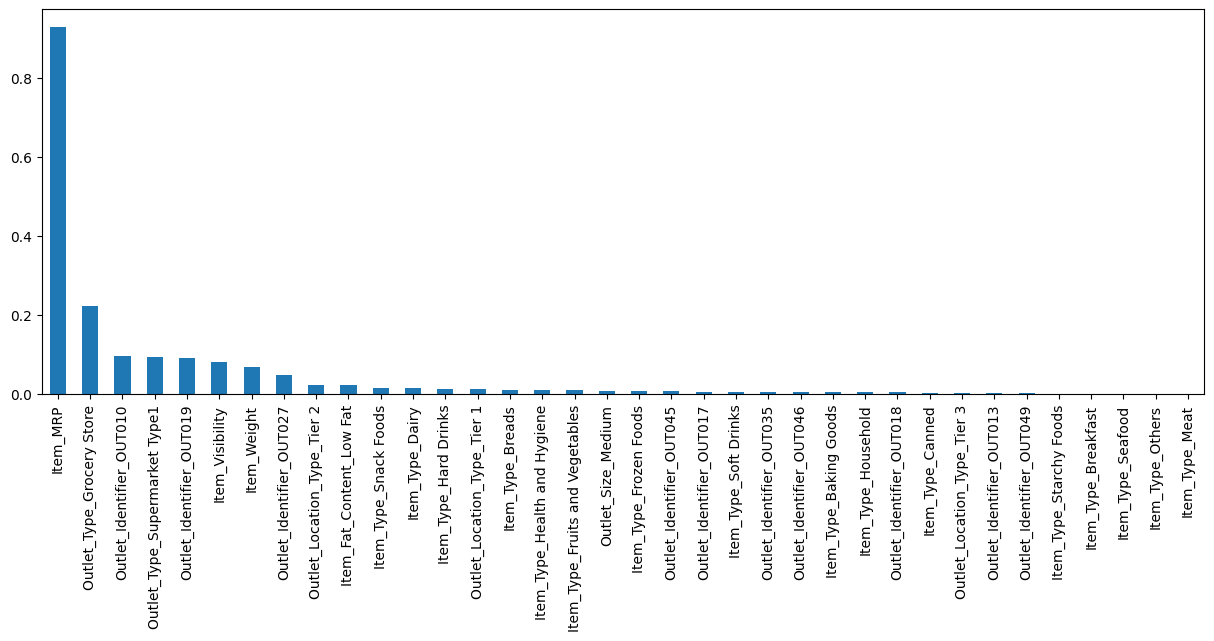

In [83]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [84]:
from sklearn.feature_selection import SelectPercentile


In [85]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=25)
selected_top_columns.fit(X_new, y_final)

SelectPercentile(percentile=25,
                 score_func=<function mutual_info_regression at 0x00000216E30F71F0>)

In [86]:
selected_top_columns.get_support()


array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True])

In [87]:
X_new.columns[selected_top_columns.get_support()]


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1'],
      dtype='object')

In [88]:
len(X_new.columns[selected_top_columns.get_support()])

9

In [89]:
Final_X_new = X_new[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1']]

In [90]:
Final_X_new

Item_Weight  Item_Visibility  Item_MRP  Outlet_Identifier_OUT010  \
0       -0.822636        -1.096267  1.623670                     False   
1       -1.733801        -0.968790 -1.595016                     False   
2        1.086362        -1.067205  0.081237                     False   
3        1.447728        -1.996676  0.689968                      True   
4       -0.917588        -1.996676 -1.476078                     False   
...           ...              ...       ...                       ...   
8518    -1.468096         0.059306  1.148258                     False   
8519    -1.060659        -0.157468 -0.463127                     False   
8520    -0.496556        -0.457417 -0.867930                     False   
8521    -1.373443         1.387998 -0.548996                     False   
8522     0.491786        -0.207459 -1.047227                     False   

      Outlet_Identifier_OUT019  Outlet_Identifier_OUT027  \
0                        False                     False   
1                        False                     False   
2                        False                     False   
3                        False                     False   
4                        False                     False   
...                        ...                       ...   
8518                     False                     False   
8519                     False                     False   
8520                     False                     False   
8521                     False                     False   
8522                     False                     False   

      Outlet_Location_Type_Tier 2  Outlet_Type_Grocery Store  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                       True   
4                           False                      False   
...                           ...                        ...   
8518                        False                      False   
8519                         True                      False   
8520                         True                      False   
8521                        False                      False   
8522                        False                      False   

      Outlet_Type_Supermarket Type1  
0                              True  
1                             False  
2                              True  
3                             False  
4                              True  
...                             ...  
8518                           True  
8519                           True  
8520                           True  
8521                          False  
8522                           True  

[8523 rows x 9 columns]

In [91]:
Final_X_new.describe()

Item_Weight  Item_Visibility      Item_MRP
count  8.523000e+03     8.523000e+03  8.523000e+03
mean   1.365146e-16    -1.392240e-16  8.920342e-17
std    1.000059e+00     1.000059e+00  1.000059e+00
min   -2.137216e+00    -1.996676e+00 -1.985109e+00
25%   -8.200840e-01    -7.010298e-01 -7.114942e-01
50%    4.564715e-02    -1.279189e-03  1.030237e-01
75%    7.594158e-01     7.267828e-01  7.412622e-01
max    1.892347e+00     2.928955e+00  1.846361e+00

In [131]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit_transform(Final_X_new)

array([[-8.18679067e-01, -6.37739145e-01,  1.86453233e+00, ...,
         4.85565306e-03, -7.24274507e-02, -3.02872072e-16],
       [ 1.94536081e+00, -1.57832809e+00,  2.16470260e-01, ...,
         1.30830397e-02,  4.73490917e-01, -2.37897532e-15],
       [-1.15419658e+00, -8.52224888e-01, -5.56639276e-01, ...,
        -1.81560700e-04, -6.64994457e-02, -4.38531704e-17],
       ...,
       [ 7.45639593e-01, -8.42014827e-01, -1.68739608e-01, ...,
         2.56619025e-03,  3.43834929e-03,  2.15678716e-18],
       [ 1.75642830e+00,  9.87004483e-01,  3.76884507e-01, ...,
         2.81663927e-03,  4.92873339e-01,  2.43851164e-17],
       [ 2.54067605e-01, -4.90679891e-01, -1.04166003e+00, ...,
        -3.51024821e-03, -5.92355436e-02, -4.13948786e-18]])

In [132]:
pd.DataFrame(pca.fit_transform(Final_X_new))

0         1         2         3         4         5         6  \
0    -0.818679 -0.637739  1.864532  0.049701 -0.162079 -0.435785  0.004856   
1     1.945361 -1.578328  0.216470  0.709842 -0.087542  0.039868  0.013083   
2    -1.154197 -0.852225 -0.556639 -0.009506 -0.159775 -0.435742 -0.000182   
3    -2.024539 -1.255072 -0.314559  1.242379  0.970647 -0.142546 -0.673514   
4     0.957200 -2.470075 -0.110683  0.149570 -0.089504 -0.451586  0.006823   
...        ...       ...       ...       ...       ...       ...       ...   
8518  0.298095  0.199053  1.831205 -0.091004 -0.259030 -0.422633  0.000793   
8519  0.973690 -0.508641  0.469736 -0.665038  0.207547  0.245860  0.002676   
8520  0.745640 -0.842015 -0.168740 -0.641443  0.233608  0.242082  0.002566   
8521  1.756428  0.987004  0.376885  0.397353 -0.279874  0.071230  0.002817   
8522  0.254068 -0.490680 -1.041660 -0.116819 -0.232517 -0.427178 -0.003510   

             7             8  
0    -0.072427 -3.028721e-16  
1     0.473491 -2.378975e-15  
2    -0.066499 -4.385317e-17  
3    -0.114041  3.124492e-15  
4    -0.076711 -1.166699e-15  
...        ...           ...  
8518 -0.063516 -8.809857e-18  
8519  0.004337  3.091997e-18  
8520  0.003438  2.156787e-18  
8521  0.492873  2.438512e-17  
8522 -0.059236 -4.139488e-18  

[8523 rows x 9 columns]

In [133]:
pca.explained_variance_ratio_

array([2.71580710e-01, 2.69489787e-01, 2.58491176e-01, 1.03702341e-01,
       3.93471663e-02, 3.19789037e-02, 1.68164223e-02, 8.59349424e-03,
       6.43174080e-34])

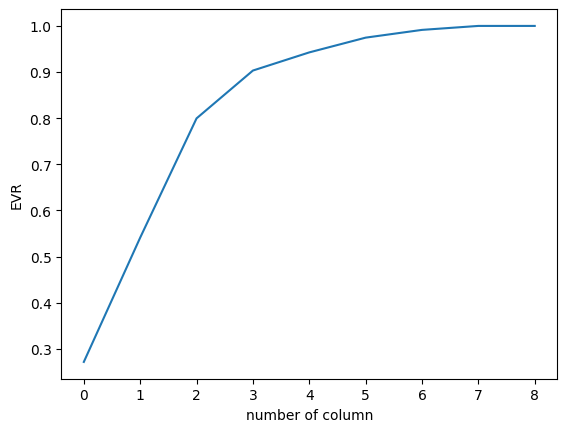

In [134]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of column')
plt.ylabel('EVR')
plt.show()

In [135]:
pca1 = PCA(n_components=4)

In [136]:
new_data = pca1.fit_transform(Final_X_new)

In [137]:
new_data

array([[-0.81867907, -0.63773914,  1.86453233,  0.04970069],
       [ 1.94536081, -1.57832809,  0.21647026,  0.70984212],
       [-1.15419658, -0.85222489, -0.55663928, -0.00950597],
       ...,
       [ 0.74563959, -0.84201483, -0.16873961, -0.64144271],
       [ 1.7564283 ,  0.98700448,  0.37688451,  0.39735265],
       [ 0.25406761, -0.49067989, -1.04166003, -0.1168191 ]])

In [138]:
x_final = pd.DataFrame(new_data  , columns=['PC1' , 'PC2','PC3' , 'PC4'])

In [139]:
x_final

PC1       PC2       PC3       PC4
0    -0.818679 -0.637739  1.864532  0.049701
1     1.945361 -1.578328  0.216470  0.709842
2    -1.154197 -0.852225 -0.556639 -0.009506
3    -2.024539 -1.255072 -0.314559  1.242379
4     0.957200 -2.470075 -0.110683  0.149570
...        ...       ...       ...       ...
8518  0.298095  0.199053  1.831205 -0.091004
8519  0.973690 -0.508641  0.469736 -0.665038
8520  0.745640 -0.842015 -0.168740 -0.641443
8521  1.756428  0.987004  0.376885  0.397353
8522  0.254068 -0.490680 -1.041660 -0.116819

[8523 rows x 4 columns]

In [140]:
y_final

0       0.985078
1      -1.218135
2       0.220360
3      -0.835183
4      -0.566616
          ...   
8518    0.573946
8519   -1.062855
8520   -0.393044
8521    0.070669
8522   -0.797934
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [212]:
X = pd.DataFrame(data_transformed[['Item_MRP','Outlet_Type_Grocery Store']])

In [213]:
X

Item_MRP  Outlet_Type_Grocery Store
0     1.623670                          0
1    -1.595016                          0
2     0.081237                          0
3     0.689968                          1
4    -1.476078                          0
...        ...                        ...
8518  1.148258                          0
8519 -0.463127                          0
8520 -0.867930                          0
8521 -0.548996                          0
8522 -1.047227                          0

[8523 rows x 2 columns]

In [214]:
y = pd.DataFrame(data_transformed['Item_Outlet_Sales'])

In [215]:
y

Item_Outlet_Sales
0              0.985078
1             -1.218135
2              0.220360
3             -0.835183
4             -0.566616
...                 ...
8518           0.573946
8519          -1.062855
8520          -0.393044
8521           0.070669
8522          -0.797934

[8523 rows x 1 columns]

## Model Training

In [216]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Preparing X and Y variables


In [217]:
X

Item_MRP  Outlet_Type_Grocery Store
0     1.623670                          0
1    -1.595016                          0
2     0.081237                          0
3     0.689968                          1
4    -1.476078                          0
...        ...                        ...
8518  1.148258                          0
8519 -0.463127                          0
8520 -0.867930                          0
8521 -0.548996                          0
8522 -1.047227                          0

[8523 rows x 2 columns]

In [218]:
y

Item_Outlet_Sales
0              0.985078
1             -1.218135
2              0.220360
3             -0.835183
4             -0.566616
...                 ...
8518           0.573946
8519          -1.062855
8520          -0.393044
8521           0.070669
8522          -0.797934

[8523 rows x 1 columns]

In [219]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6818, 2), (1705, 2))

#### Create an Evaluate Function to give all metrics after model Training

In [220]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [221]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.6034
- Mean Absolute Error: 0.4709
- R2 Score: 0.6366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5868
- Mean Absolute Error: 0.4582
- R2 Score: 0.6519


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0010
- Mean Absolute Error: 0.8186
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9962
- Mean Absolute Error: 0.8158
- R2 Score: -0.0036


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.6034
- Mean Absolute Error: 0.4709
- R2 Score: 0.6366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5867
- Mean Absolute Error: 0.4582
- R2 Score: 0.6519


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5330
- Mean Absolute Error: 0.4127
- R2 Score: 0.7165
----------------------

In [222]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error', 'absolute_error']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error']}


In [223]:
from sklearn.model_selection import KFold

rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=KFold(n_splits=5),verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [224]:
rf_randomcv.best_params_


{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [225]:
rf_randomcv


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [226]:
best_random_grid=rf_randomcv.best_estimator_


In [227]:
from sklearn.metrics import r2_score
y_pred=best_random_grid.predict(X_test)
print(r2_score(y_test,y_pred))
print("r2_score  {}".format(r2_score(y_test,y_pred)))


0.6538503855478075
r2_score  0.6538503855478075


In [228]:
rf_randomcv.best_params_


{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [229]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['absolute_error'], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [230]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


In [149]:
"""import optuna
from optuna import trial
import sklearn
from sklearn.model_selection import KFold

def objective(trial):
            
        max_depth  = trial.suggest_categorical('max_depth', [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
        criterion = trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'friedman_mse'])
        max_features = trial.suggest_categorical('max_features', ['sqrt','log2', None])
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 10)
        min_samples_split = trial.suggest_int('min_samples_split', 3, 10)
        n_estimators = trial.suggest_int('n_estimators', 400, 500)

        clf = sklearn.ensemble.RandomForestRegressor(
            n_estimators=n_estimators, max_depth=max_depth,criterion =criterion, max_features = max_features, min_samples_leaf = min_samples_leaf, 
            min_samples_split=min_samples_split)
        
        return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv= KFold(10),scoring = 'neg_root_mean_squared_error').mean()
    
    

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))"""

'import optuna\nfrom optuna import trial\nimport sklearn\nfrom sklearn.model_selection import KFold\n\ndef objective(trial):\n            \n        max_depth  = trial.suggest_categorical(\'max_depth\', [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])\n        criterion = trial.suggest_categorical(\'criterion\', [\'squared_error\', \'absolute_error\', \'friedman_mse\'])\n        max_features = trial.suggest_categorical(\'max_features\', [\'sqrt\',\'log2\', None])\n        min_samples_leaf = trial.suggest_int(\'min_samples_leaf\', 3, 10)\n        min_samples_split = trial.suggest_int(\'min_samples_split\', 3, 10)\n        n_estimators = trial.suggest_int(\'n_estimators\', 400, 500)\n\n        clf = sklearn.ensemble.RandomForestRegressor(\n            n_estimators=n_estimators, max_depth=max_depth,criterion =criterion, max_features = max_features, min_samples_leaf = min_samples_leaf, \n            min_samples_split=min_samples_split)\n        \n        return sklearn.model_selection.cross_va

In [112]:
study.best_params


NameError: name 'study' is not defined

In [ ]:
rf=RandomForestRegressor(n_estimators=10,max_depth=5,min_samples_split=5,min_samples_leaf=1,max_features=None,criterion='squared_error' )
rf.fit(X_train,y_train)

In [ ]:
from sklearn import metrics

y_pred=rf.predict(X_test)
print(r2_score(y_test,y_pred)*100)


In [ ]:
import numpy as np

value = 

rounded_value = np.around(value, 1)

print(rounded_value)

In [ ]:
space = {'criterion': hp.choice('criterion', ['squared_error', 'absolute_error', 'friedman_mse']),
        'max_depth': hp.randint('max_depth', 10, 1200)+1,
        'max_features': hp.choice('max_features', ['sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }
space

In [ ]:
def objective(space):
    model = RandomForestRegressor(criterion = space['criterion'], 
                                  max_depth = space['max_depth'],
                                  max_features = space['max_features'],
                                  min_samples_leaf = space['min_samples_leaf'],
                                  min_samples_split = space['min_samples_split'],
                                  n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
"""from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best"""